<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/Compare%20MLP%20vs%20CNN/fashion%20mnist/43_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
wandb.init(project= "MLP Fashion Mnist")

In [ ]:
config = wandb.config
config.learning_rate = 0.001


In [ ]:
(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0 , X_test / 255.0

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, shuffle=True)

### MLP Model

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28, 28)),
      #  Dense(128, activation="relu"),
       Dense(64, activation="relu"),
       Dense(32, activation="relu"),
       Dense(10, activation="softmax")                                     
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [ ]:
model_history = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3243 - accuracy: 0.8805 - val_loss: 0.3520 - val_accuracy: 0.8740 - _timestamp: 1648272664.0000 - _runtime: 183.0000
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3100 - accuracy: 0.8844 - val_loss: 0.3404 - val_accuracy: 0.8750 - _timestamp: 1648272669.0000 - _runtime: 188.0000
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2947 - accuracy: 0.8904 - val_loss: 0.3363 - val_accuracy: 0.8789 - _timestamp: 1648272675.0000 - _runtime: 194.0000
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2863 - accuracy: 0.8935 - val_loss: 0.3438 - val_accuracy: 0.8747 - _timestamp: 1648272680.0000 - _runtime: 199.0000
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2728 - accuracy: 0.8972 - val_loss: 0.3502 - val_accuracy: 0.8723 - _timestamp: 1648272686.0000 - _runtime: 205.0000
Epoch 6/10
1407/1407 [===

## Test

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.8806


[0.354489266872406, 0.8805999755859375]

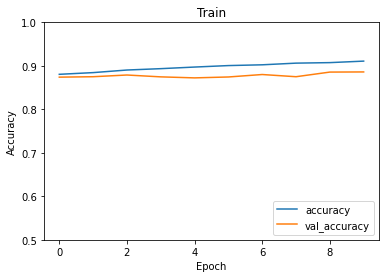

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model.save('mlp-fashionMnist.h5')

## CNN Model

In [ ]:
model = tf.keras.models.Sequential([
      layers.Conv2D(64, (3, 3), input_shape=(28,28, 1), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (5, 5), activation='relu'),
      layers.Flatten(),
      
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [ ]:
model_history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 18s 7ms/step - loss: 0.5872 - accuracy: 0.7848 - val_loss: 0.4398 - val_accuracy: 0.8445 - _timestamp: 1648272734.0000 - _runtime: 253.0000
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3858 - accuracy: 0.8607 - val_loss: 0.3570 - val_accuracy: 0.8710 - _timestamp: 1648272744.0000 - _runtime: 263.0000
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3285 - accuracy: 0.8813 - val_loss: 0.3370 - val_accuracy: 0.8763 - _timestamp: 1648272756.0000 - _runtime: 275.0000
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2956 - accuracy: 0.8926 - val_loss: 0.3236 - val_accuracy: 0.8849 - _timestamp: 1648272766.0000 - _runtime: 285.0000
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2736 - accuracy: 0.8998 - val_loss: 0.3170 - val_accuracy: 0.8879 - _timestamp: 1648272776.0000 - _runtime: 295.0000
Epoch 6/10
1407/1407

In [ ]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2959 - accuracy: 0.8935


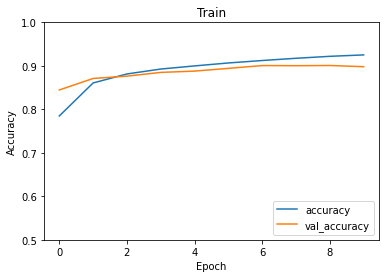

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
model.save('cnn-mlp-fashionMnist.h5')